In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch

from src.data.sampling import extract_sample
from src.inference import load_model_and_data

In [2]:
def visualize_inference(y_hat, target_inds, acc_val, title="Inference Results"):
    """
    Визуализирует результаты инференса, показывая предсказанные и истинные метки.

    Args:
        y_hat (torch.Tensor): Тензор с предсказанными классами.
        target_inds (torch.Tensor): Тензор с истинными метками.
        acc_val (float): Точность.
        title (str): Заголовок графика.
    """
    y_hat = y_hat.cpu().numpy()  # Move to CPU and convert to NumPy arrays
    target_inds = target_inds.cpu().numpy()
    n_samples = len(y_hat)

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size for better visualization

    # Create a bar chart
    bar_width = 0.4  # Increased bar width for readability
    x = np.arange(n_samples)

    # Correct predictions in green, incorrect in red
    colors = ["green" if y_hat[i] == target_inds[i] else "red" for i in range(n_samples)]
    bars = ax.bar(x, 1, bar_width, bottom=0, color=colors)  # draw a bar for each sample, height is always 1
    # Add labels to the bars (pred_label / true_label)
    for bar, pred, true in zip(bars, y_hat, target_inds):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{pred} / {true}", ha="center", va="bottom", fontsize=8)

    # Customize the plot
    ax.set_xlabel("Запросные изображения", fontsize=12)  # Added label
    ax.set_ylabel("Правильность предсказания", fontsize=12)
    ax.set_title(f"{title} - Точность: {acc_val:.2f}", fontsize=14)  # added title
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_ylim(0, 1.2)  # Correct height range

    # Add a legend
    from matplotlib.patches import Patch

    legend_elements = [Patch(facecolor="green", label="Правильно"), Patch(facecolor="red", label="Неправильно")]
    ax.legend(handles=legend_elements, loc="upper right")
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# Инференс без SimCLR с лучшей моделью: 5-way, 5-shot, 5-query

In [16]:
model_path = Path(os.getcwd()).parent / "model" / "protonet_without_simclr_5-way, 5-shot, 5-query"
model, test_x, test_y = load_model_and_data(model_path)

2025-06-03 20:57:11,521 - inference - INFO - Devise is cpu
2025-06-03 20:57:11,523 - OmniglotLoader - INFO - Loading training data...
2025-06-03 20:57:11,523 - OmniglotLoader - INFO - Loading training data...
2025-06-03 20:57:11,623 - OmniglotLoader - INFO - Loading test data...
2025-06-03 20:57:11,623 - OmniglotLoader - INFO - Loading test data...


In [32]:
n_way = 2
n_support = 5
n_query = 5

In [39]:
sample = extract_sample(n_way, n_support, n_query, test_x, test_y)
loss, output = model.set_forward_loss(sample)
target_inds = torch.arange(0, n_way).view(n_way, 1).expand(n_way, n_query).reshape(-1).to("cpu")

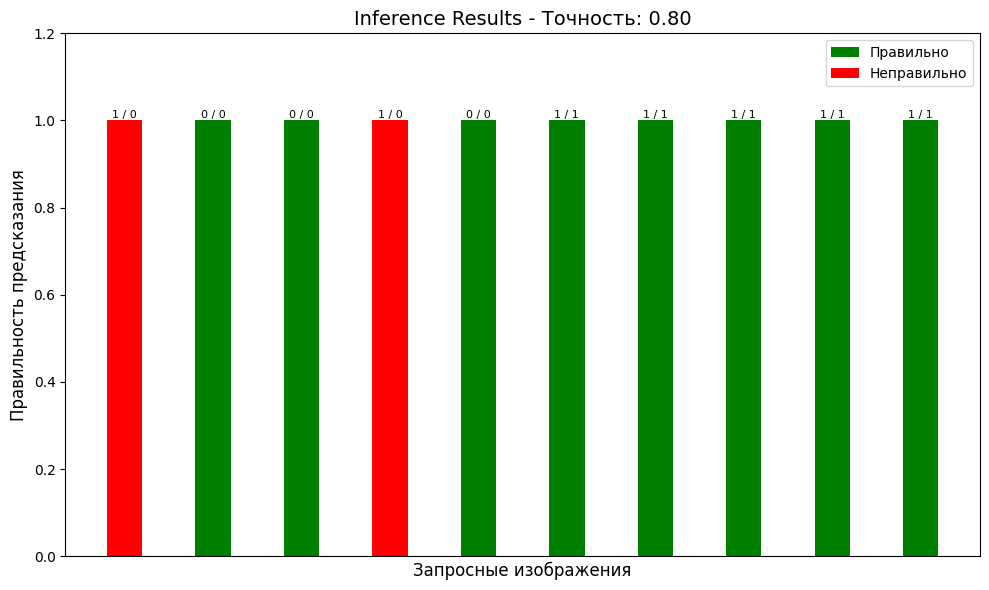

In [40]:
y_hat = output["y_hat"]
acc_val = output["acc"]

visualize_inference(y_hat, target_inds, acc_val)

# Инференс с использованием SimCLR с лучшей моделью: 5-way, 5-shot, 5-query

In [ ]:
model_path = Path(os.getcwd()).parent / "model" / "protonet_with_simclr_5-way, 5-shot, 5-query"
model, test_x, test_y = load_model_and_data(model_path)

In [ ]:
n_way = 2
n_support = 5
n_query = 5

In [ ]:
sample = extract_sample(n_way, n_support, n_query, test_x, test_y)
loss, output = model.set_forward_loss(sample)
target_inds = torch.arange(0, n_way).view(n_way, 1).expand(n_way, n_query).reshape(-1).to("cpu")

In [ ]:
y_hat = output["y_hat"]
acc_val = output["acc"]

visualize_inference(y_hat, target_inds, acc_val)